In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
path = r'C:\Users\abhir\Downloads\CarPrice_Assignment.csv'
df = pd.read_csv(path)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [2]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")
for column in df.columns:
    data_type = df[column].dtype
    print(f"Column '{column}' has data type: {data_type}")

Unique values in column 'car_ID':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]


Unique values in column 'symboling':
[ 3  1  2  0 -1 -2]


Unique values in column 'CarName':
['alfa-romero giulia' 'alfa-romero st

In [3]:
df.drop_duplicates(inplace=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df['CarName'] = df['CarName'].str.replace(r'\(.*\)', '', regex=True)


In [5]:
df['CarName'] = df['CarName'].str.replace('-', ' ')

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")
for column in df.columns:
    data_type = df[column].dtype
    print(f"Column '{column}' has data type: {data_type}")

Unique values in column 'car_ID':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]


Unique values in column 'symboling':
[ 3  1  2  0 -1 -2]


Unique values in column 'CarName':
['alfa romero giulia' 'alfa romero st

In [7]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.isna().count()

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [12]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")
for column in df.columns:
    data_type = df[column].dtype
    print(f"Column '{column}' has data type: {data_type}")

Unique values in column 'car_ID':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]


Unique values in column 'symboling':
[ 3  1  2  0 -1 -2]


Unique values in column 'CarName':
['alfa romero giulia' 'alfa romero st

In [13]:
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',])
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')


In [14]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')

In [15]:
mean = np.mean(df['price'])
print("mean=",mean)
std = np.std(df['price'])
print("standard deviation=",std)

mean= 13276.710570731706
standard deviation= 7969.34350572002


In [16]:
df["zscore"]=(df.price-mean)/std
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,zscore
0,1,3,alfa romero giulia,2,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,0.027391
1,2,3,alfa romero stelvio,2,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,0.404461
2,3,1,alfa romero Quadrifoglio,2,front,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0.404461
3,4,2,audi 100 ls,4,front,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,0,0.084485
4,5,2,audi 100ls,4,front,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,0,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e,4,front,109.1,188.8,68.9,55.5,2952,...,0,1,0,0,0,1,0,0,0,0.447752
201,202,-1,volvo 144ea,4,front,109.1,188.8,68.8,55.5,3049,...,0,1,0,0,0,1,0,0,0,0.723810
202,203,-1,volvo 244dl,4,front,109.1,188.8,68.9,55.5,3012,...,0,1,0,0,0,0,0,1,0,1.029983
203,204,-1,volvo 246,4,front,109.1,188.8,68.9,55.5,3217,...,0,1,0,0,0,1,0,0,0,1.153582


In [17]:
df[(df.zscore<-3)|(df.zscore>3)]

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,zscore
16,17,0,bmw x5,2,front,103.5,193.8,67.9,53.7,3380,...,0,1,0,0,0,1,0,0,0,3.518268
73,74,0,buick century special,4,front,120.9,208.1,71.7,56.7,3900,...,0,1,0,0,0,0,0,1,0,3.473723
74,75,1,buick regal sport coupe,2,front,112.0,199.2,72.0,55.4,3715,...,0,1,0,0,0,0,0,1,0,4.030858


In [18]:
without_outlier=df[(df.zscore>-3)&(df.zscore<3)]
df=without_outlier
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,zscore
0,1,3,alfa romero giulia,2,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,0.027391
1,2,3,alfa romero stelvio,2,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,0.404461
2,3,1,alfa romero Quadrifoglio,2,front,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0.404461
3,4,2,audi 100 ls,4,front,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,0,0.084485
4,5,2,audi 100ls,4,front,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,0,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e,4,front,109.1,188.8,68.9,55.5,2952,...,0,1,0,0,0,1,0,0,0,0.447752
201,202,-1,volvo 144ea,4,front,109.1,188.8,68.8,55.5,3049,...,0,1,0,0,0,1,0,0,0,0.723810
202,203,-1,volvo 244dl,4,front,109.1,188.8,68.9,55.5,3012,...,0,1,0,0,0,0,0,1,0,1.029983
203,204,-1,volvo 246,4,front,109.1,188.8,68.9,55.5,3217,...,0,1,0,0,0,1,0,0,0,1.153582


In [19]:
x = df[['car_ID','symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']]

y = df[['price']]


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 1.        , 0.        , ..., 0.34693878, 0.22222222,
        0.27027027],
       [0.00490196, 1.        , 0.        , ..., 0.34693878, 0.22222222,
        0.27027027],
       [0.00980392, 0.6       , 0.        , ..., 0.34693878, 0.16666667,
        0.24324324],
       ...,
       [0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.99509804, 0.2       , 1.        , ..., 0.26530612, 0.36111111,
        0.27027027],
       [1.        , 0.2       , 1.        , ..., 0.51020408, 0.16666667,
        0.21621622]])

In [21]:
y_scaled=scaler.fit_transform(y)
y_scaled

array([[0.26251959],
       [0.35669069],
       [0.35669069],
       [0.27677844],
       [0.38646192],
       [0.31751802],
       [0.39460984],
       [0.43252899],
       [0.58780946],
       [0.39928446],
       [0.35449702],
       [0.3700094 ],
       [0.49677217],
       [0.50100282],
       [0.60943278],
       [0.80357255],
       [0.99536196],
       [0.00103416],
       [0.03688499],
       [0.04565967],
       [0.01422751],
       [0.03945472],
       [0.08896898],
       [0.03481667],
       [0.04932623],
       [0.0780633 ],
       [0.1078032 ],
       [0.11917894],
       [0.24587903],
       [0.04265121],
       [0.05443435],
       [0.00880602],
       [0.04421811],
       [0.063021  ],
       [0.06822313],
       [0.06822313],
       [0.08702601],
       [0.12463178],
       [0.11679724],
       [0.16223754],
       [0.24528361],
       [0.16380445],
       [0.05224068],
       [0.11903792],
       [0.11903792],
       [0.18583516],
       [0.85026637],
       [0.953

# Linear Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Split the dataset into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Train a Gradient Boosting model
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model on the testing set
gb_predictions = gb_regressor.predict(x_test)

# Combine features (stacking the original features and predictions)
x_linear_regression = np.column_stack((x_test, gb_predictions))

# Build and train the multiple linear regression model on the training set
reg = LinearRegression()
reg.fit(x_linear_regression, y_test)

# Make predictions with the Linear Regression model on the testing set
pred = reg.predict(x_linear_regression)


C:\Users\abhir\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
x_train

array([[0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.19117647, 0.4       , 1.        , ..., 0.67346939, 0.38888889,
        0.43243243],
       [0.12254902, 0.6       , 1.        , ..., 0.55102041, 0.5       ,
        0.56756757],
       ...,
       [0.46568627, 0.6       , 0.        , ..., 0.42857143, 0.5       ,
        0.54054054],
       [0.89215686, 0.8       , 0.        , ..., 0.26530612, 0.66666667,
        0.78378378],
       [0.51470588, 1.        , 0.        , ..., 0.42857143, 0.11111111,
        0.16216216]])

In [24]:
x_test

array([[0.48039216, 0.8       , 0.        , 0.29310345, 0.34634146,
        0.29166667, 0.45833333, 0.20170675, 0.2       , 0.13584906,
        0.43571429, 0.58095238, 0.15      , 0.0875    , 0.42857143,
        0.5       , 0.54054054],
       [0.07352941, 0.4       , 1.        , 0.58275862, 0.77886179,
        0.55      , 0.65833333, 0.67571761, 0.4       , 0.55849057,
        0.77142857, 0.62857143, 0.0625    , 0.55833333, 0.51020408,
        0.08333333, 0.13513514],
       [0.15196078, 0.8       , 0.        , 0.        , 0.05691057,
        0.3       , 0.25      , 0.1283941 , 0.2       , 0.11698113,
        0.26428571, 0.63809524, 0.1375    , 0.11666667, 0.75510204,
        0.5       , 0.56756757],
       [0.79411765, 0.4       , 1.        , 0.3137931 , 0.4097561 ,
        0.34166667, 0.41666667, 0.25290923, 0.2       , 0.13962264,
        0.46428571, 0.45714286, 0.125     , 0.09166667, 0.26530612,
        0.41666667, 0.45945946],
       [0.92647059, 1.        , 0.        , 0.272413

In [25]:
y_train

array([[0.51291131],
       [0.11679724],
       [0.04932623],
       [0.52961454],
       [0.36750235],
       [0.04265121],
       [0.04565967],
       [0.15919774],
       [0.01193983],
       [0.40839862],
       [0.3585083 ],
       [0.31751802],
       [0.1308994 ],
       [0.03481667],
       [0.00849264],
       [0.12895644],
       [0.26264494],
       [0.19210279],
       [0.12005641],
       [0.17486681],
       [0.13885929],
       [0.00880602],
       [0.49677217],
       [0.06822313],
       [0.0780633 ],
       [0.05224068],
       [0.24512692],
       [0.06991539],
       [0.07787527],
       [0.05255406],
       [0.14970229],
       [0.13851457],
       [0.16380445],
       [0.04932623],
       [0.40213099],
       [0.1078032 ],
       [0.13099342],
       [0.26264494],
       [0.37471012],
       [0.35669069],
       [0.15170793],
       [0.85026637],
       [0.27348793],
       [0.34055155],
       [0.13039799],
       [0.        ],
       [0.08702601],
       [0.260

In [26]:
y_test

array([[0.09811971],
       [0.80357255],
       [0.05443435],
       [0.12973989],
       [0.20297712],
       [0.01422751],
       [0.82989658],
       [0.15261673],
       [0.09777499],
       [0.18583516],
       [0.64036352],
       [0.05640865],
       [0.15264807],
       [0.10595425],
       [0.41685992],
       [0.54377938],
       [0.26722031],
       [0.05703541],
       [0.05863366],
       [0.7225948 ],
       [1.        ],
       [0.99536196],
       [0.13716703],
       [0.07461611],
       [0.41447822],
       [0.17163898],
       [0.13039799],
       [0.72485114],
       [0.82364463],
       [0.15173927],
       [0.39928446],
       [0.03688499],
       [0.21081166],
       [0.04860545],
       [0.10438734],
       [0.21253526],
       [0.0606393 ],
       [0.06292698],
       [0.14167972],
       [0.08057035],
       [0.23538076]])

In [27]:
pred

array([[ 0.0283275 ],
       [ 0.90103837],
       [ 0.11177734],
       [ 0.07272183],
       [ 0.13031887],
       [-0.01173697],
       [ 0.71693937],
       [ 0.11104734],
       [ 0.05290523],
       [ 0.16745416],
       [ 0.72451586],
       [ 0.06742536],
       [ 0.20150956],
       [ 0.09128383],
       [ 0.38661705],
       [ 0.57626222],
       [ 0.23519717],
       [ 0.07332557],
       [ 0.08990003],
       [ 0.70414279],
       [ 0.9327809 ],
       [ 0.9247085 ],
       [ 0.20269857],
       [ 0.01112101],
       [ 0.35578441],
       [ 0.14766308],
       [ 0.10841928],
       [ 0.71983562],
       [ 0.82864098],
       [ 0.15191401],
       [ 0.43294575],
       [ 0.06727479],
       [ 0.23559805],
       [ 0.08226946],
       [ 0.2109113 ],
       [ 0.3288039 ],
       [ 0.08243953],
       [ 0.06990197],
       [ 0.20256643],
       [ 0.08685151],
       [ 0.19419266]])

In [28]:
print("Coefficients:", reg.coef_)

Coefficients: [[-0.0148676  -0.04403984 -0.03048524  0.11082434 -0.13106632  0.15880943
   0.08077727 -0.1691154  -1.08495555  1.49355856 -0.38956987 -0.47378748
   0.26718137 -0.06457235  0.11440259 -0.73552211  0.52380531  0.75903975]]


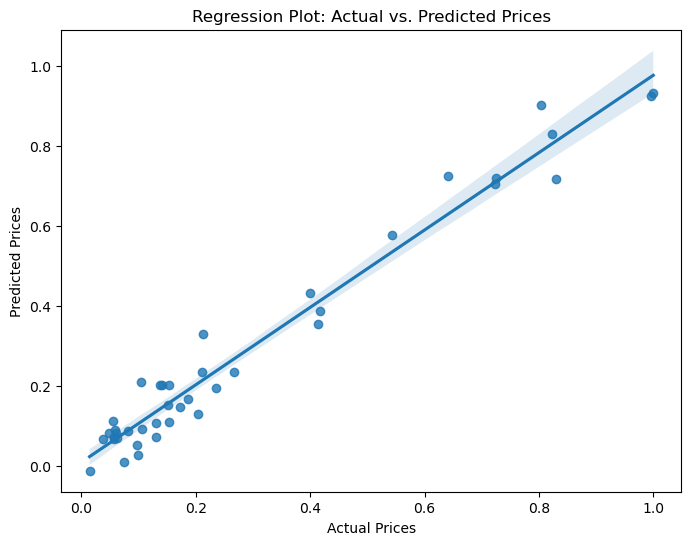

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

# Create a regression plot (scatter plot with a regression line)
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Plot: Actual vs. Predicted Prices')
plt.show()


In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 0.002807619148199084
Root Mean Squared Error (RMSE): 0.05298697149487867
Mean Absolute Error (MAE): 0.04345456238441261
R-squared (coefficient of determination): 0.96617081727547


In [31]:
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,zscore
0,1,3,alfa romero giulia,2,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,0.027391
1,2,3,alfa romero stelvio,2,front,88.6,168.8,64.1,48.8,2548,...,0,1,1,0,0,0,0,0,0,0.404461
2,3,1,alfa romero Quadrifoglio,2,front,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0.404461
3,4,2,audi 100 ls,4,front,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,0,0.084485
4,5,2,audi 100ls,4,front,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,0,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e,4,front,109.1,188.8,68.9,55.5,2952,...,0,1,0,0,0,1,0,0,0,0.447752
201,202,-1,volvo 144ea,4,front,109.1,188.8,68.8,55.5,3049,...,0,1,0,0,0,1,0,0,0,0.723810
202,203,-1,volvo 244dl,4,front,109.1,188.8,68.9,55.5,3012,...,0,1,0,0,0,0,0,1,0,1.029983
203,204,-1,volvo 246,4,front,109.1,188.8,68.9,55.5,3217,...,0,1,0,0,0,1,0,0,0,1.153582


# DecisionTree

In [32]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error




# Assuming df is your DataFrame with the data

# Features
x = df[['car_ID', 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Create the Decision Tree Regressor object
regressor = DecisionTreeRegressor(max_depth=8, random_state=100)

# Fit the model
regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_d = regressor.predict(x_test)




In [33]:
x_test

array([[0.48039216, 0.8       , 0.        , 0.29310345, 0.34634146,
        0.29166667, 0.45833333, 0.20170675, 0.2       , 0.13584906,
        0.43571429, 0.58095238, 0.15      , 0.0875    , 0.42857143,
        0.5       , 0.54054054],
       [0.07352941, 0.4       , 1.        , 0.58275862, 0.77886179,
        0.55      , 0.65833333, 0.67571761, 0.4       , 0.55849057,
        0.77142857, 0.62857143, 0.0625    , 0.55833333, 0.51020408,
        0.08333333, 0.13513514],
       [0.15196078, 0.8       , 0.        , 0.        , 0.05691057,
        0.3       , 0.25      , 0.1283941 , 0.2       , 0.11698113,
        0.26428571, 0.63809524, 0.1375    , 0.11666667, 0.75510204,
        0.5       , 0.56756757],
       [0.79411765, 0.4       , 1.        , 0.3137931 , 0.4097561 ,
        0.34166667, 0.41666667, 0.25290923, 0.2       , 0.13962264,
        0.46428571, 0.45714286, 0.125     , 0.09166667, 0.26530612,
        0.41666667, 0.45945946],
       [0.92647059, 1.        , 0.        , 0.272413

In [34]:
y_test

array([[0.09811971],
       [0.80357255],
       [0.05443435],
       [0.12973989],
       [0.20297712],
       [0.01422751],
       [0.82989658],
       [0.15261673],
       [0.09777499],
       [0.18583516],
       [0.64036352],
       [0.05640865],
       [0.15264807],
       [0.10595425],
       [0.41685992],
       [0.54377938],
       [0.26722031],
       [0.05703541],
       [0.05863366],
       [0.7225948 ],
       [1.        ],
       [0.99536196],
       [0.13716703],
       [0.07461611],
       [0.41447822],
       [0.17163898],
       [0.13039799],
       [0.72485114],
       [0.82364463],
       [0.15173927],
       [0.39928446],
       [0.03688499],
       [0.21081166],
       [0.04860545],
       [0.10438734],
       [0.21253526],
       [0.0606393 ],
       [0.06292698],
       [0.14167972],
       [0.08057035],
       [0.23538076]])

In [35]:
x_train

array([[0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.19117647, 0.4       , 1.        , ..., 0.67346939, 0.38888889,
        0.43243243],
       [0.12254902, 0.6       , 1.        , ..., 0.55102041, 0.5       ,
        0.56756757],
       ...,
       [0.46568627, 0.6       , 0.        , ..., 0.42857143, 0.5       ,
        0.54054054],
       [0.89215686, 0.8       , 0.        , ..., 0.26530612, 0.66666667,
        0.78378378],
       [0.51470588, 1.        , 0.        , ..., 0.42857143, 0.11111111,
        0.16216216]])

In [36]:
y_train

array([[0.51291131],
       [0.11679724],
       [0.04932623],
       [0.52961454],
       [0.36750235],
       [0.04265121],
       [0.04565967],
       [0.15919774],
       [0.01193983],
       [0.40839862],
       [0.3585083 ],
       [0.31751802],
       [0.1308994 ],
       [0.03481667],
       [0.00849264],
       [0.12895644],
       [0.26264494],
       [0.19210279],
       [0.12005641],
       [0.17486681],
       [0.13885929],
       [0.00880602],
       [0.49677217],
       [0.06822313],
       [0.0780633 ],
       [0.05224068],
       [0.24512692],
       [0.06991539],
       [0.07787527],
       [0.05255406],
       [0.14970229],
       [0.13851457],
       [0.16380445],
       [0.04932623],
       [0.40213099],
       [0.1078032 ],
       [0.13099342],
       [0.26264494],
       [0.37471012],
       [0.35669069],
       [0.15170793],
       [0.85026637],
       [0.27348793],
       [0.34055155],
       [0.13039799],
       [0.        ],
       [0.08702601],
       [0.260

In [37]:
pred_d

array([0.06735819, 0.85026637, 0.04008148, 0.10153557, 0.15236603,
       0.02179045, 0.32431448, 0.17532644, 0.09213413, 0.27260806,
       0.32431448, 0.08712003, 0.19565967, 0.09623942, 0.37859605,
       0.43644626, 0.17532644, 0.0735924 , 0.09623942, 0.32431448,
       0.90598558, 0.85026637, 0.11895957, 0.06735819, 0.41247258,
       0.11131307, 0.14105296, 0.32431448, 0.96778439, 0.14481354,
       0.50100282, 0.11903792, 0.17532644, 0.06223754, 0.19565967,
       0.32431448, 0.07973467, 0.07973467, 0.19565967, 0.08862426,
       0.27260806])

In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_d)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_d)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 0.019868784544518903
Root Mean Squared Error (RMSE): 0.14095667612610233
Mean Absolute Error (MAE): 0.08167515406938171
R-squared (coefficient of determination): 0.96617081727547


# RandomForestRegressor

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Features
x = df[['car_ID', 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
# Create the Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=100)

# Fit the model
rf_regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_r = rf_regressor.predict(x_test)




C:\Users\abhir\AppData\Local\Temp\ipykernel_5308\3725508111.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(x_train, y_train)


In [40]:
x_train

array([[0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.19117647, 0.4       , 1.        , ..., 0.67346939, 0.38888889,
        0.43243243],
       [0.12254902, 0.6       , 1.        , ..., 0.55102041, 0.5       ,
        0.56756757],
       ...,
       [0.46568627, 0.6       , 0.        , ..., 0.42857143, 0.5       ,
        0.54054054],
       [0.89215686, 0.8       , 0.        , ..., 0.26530612, 0.66666667,
        0.78378378],
       [0.51470588, 1.        , 0.        , ..., 0.42857143, 0.11111111,
        0.16216216]])

In [41]:
y_train

array([[0.51291131],
       [0.11679724],
       [0.04932623],
       [0.52961454],
       [0.36750235],
       [0.04265121],
       [0.04565967],
       [0.15919774],
       [0.01193983],
       [0.40839862],
       [0.3585083 ],
       [0.31751802],
       [0.1308994 ],
       [0.03481667],
       [0.00849264],
       [0.12895644],
       [0.26264494],
       [0.19210279],
       [0.12005641],
       [0.17486681],
       [0.13885929],
       [0.00880602],
       [0.49677217],
       [0.06822313],
       [0.0780633 ],
       [0.05224068],
       [0.24512692],
       [0.06991539],
       [0.07787527],
       [0.05255406],
       [0.14970229],
       [0.13851457],
       [0.16380445],
       [0.04932623],
       [0.40213099],
       [0.1078032 ],
       [0.13099342],
       [0.26264494],
       [0.37471012],
       [0.35669069],
       [0.15170793],
       [0.85026637],
       [0.27348793],
       [0.34055155],
       [0.13039799],
       [0.        ],
       [0.08702601],
       [0.260

In [42]:
x_test

array([[0.48039216, 0.8       , 0.        , 0.29310345, 0.34634146,
        0.29166667, 0.45833333, 0.20170675, 0.2       , 0.13584906,
        0.43571429, 0.58095238, 0.15      , 0.0875    , 0.42857143,
        0.5       , 0.54054054],
       [0.07352941, 0.4       , 1.        , 0.58275862, 0.77886179,
        0.55      , 0.65833333, 0.67571761, 0.4       , 0.55849057,
        0.77142857, 0.62857143, 0.0625    , 0.55833333, 0.51020408,
        0.08333333, 0.13513514],
       [0.15196078, 0.8       , 0.        , 0.        , 0.05691057,
        0.3       , 0.25      , 0.1283941 , 0.2       , 0.11698113,
        0.26428571, 0.63809524, 0.1375    , 0.11666667, 0.75510204,
        0.5       , 0.56756757],
       [0.79411765, 0.4       , 1.        , 0.3137931 , 0.4097561 ,
        0.34166667, 0.41666667, 0.25290923, 0.2       , 0.13962264,
        0.46428571, 0.45714286, 0.125     , 0.09166667, 0.26530612,
        0.41666667, 0.45945946],
       [0.92647059, 1.        , 0.        , 0.272413

In [43]:
y_test

array([[0.09811971],
       [0.80357255],
       [0.05443435],
       [0.12973989],
       [0.20297712],
       [0.01422751],
       [0.82989658],
       [0.15261673],
       [0.09777499],
       [0.18583516],
       [0.64036352],
       [0.05640865],
       [0.15264807],
       [0.10595425],
       [0.41685992],
       [0.54377938],
       [0.26722031],
       [0.05703541],
       [0.05863366],
       [0.7225948 ],
       [1.        ],
       [0.99536196],
       [0.13716703],
       [0.07461611],
       [0.41447822],
       [0.17163898],
       [0.13039799],
       [0.72485114],
       [0.82364463],
       [0.15173927],
       [0.39928446],
       [0.03688499],
       [0.21081166],
       [0.04860545],
       [0.10438734],
       [0.21253526],
       [0.0606393 ],
       [0.06292698],
       [0.14167972],
       [0.08057035],
       [0.23538076]])

In [44]:
pred_r

array([0.06631087, 0.84641272, 0.05159997, 0.09440896, 0.12729238,
       0.02637465, 0.41470918, 0.16934848, 0.09097587, 0.21987245,
       0.39485302, 0.08025697, 0.19724945, 0.12244469, 0.3945083 ,
       0.42755876, 0.19977687, 0.07497164, 0.11440238, 0.40307835,
       0.84144124, 0.86056158, 0.12645064, 0.0674707 , 0.22149702,
       0.12176058, 0.14963178, 0.40728674, 0.86746474, 0.14063679,
       0.45931338, 0.06979223, 0.19719148, 0.04924318, 0.19597681,
       0.28737512, 0.07282936, 0.08203291, 0.19581824, 0.09313272,
       0.27346067])

In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_r)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_r)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 0.014180739947942634
Root Mean Squared Error (RMSE): 0.1190829120736583
Mean Absolute Error (MAE): 0.07216075547844167
R-squared (coefficient of determination): 0.96617081727547


# SVM

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features
x = df[['car_ID', 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model
gb_predictions = gb_regressor.predict(x_test)

# Now, use the predictions as input features for the SVM
x_combined = np.column_stack((x_test, gb_predictions))

# Create the Support Vector Machine Regressor (SVM)
svm_regressor = SVR(kernel='linear', C=1.0)

# Fit the SVM model
svm_regressor.fit(x_combined, y_test)

# Predict the values of the test data using the SVM
pred_s = svm_regressor.predict(x_combined)


C:\Users\abhir\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhir\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
x_train

array([[0.99019608, 0.2       , 1.        , ..., 0.55102041, 0.13888889,
        0.16216216],
       [0.19117647, 0.4       , 1.        , ..., 0.67346939, 0.38888889,
        0.43243243],
       [0.12254902, 0.6       , 1.        , ..., 0.55102041, 0.5       ,
        0.56756757],
       ...,
       [0.46568627, 0.6       , 0.        , ..., 0.42857143, 0.5       ,
        0.54054054],
       [0.89215686, 0.8       , 0.        , ..., 0.26530612, 0.66666667,
        0.78378378],
       [0.51470588, 1.        , 0.        , ..., 0.42857143, 0.11111111,
        0.16216216]])

In [48]:
y_train

array([[0.51291131],
       [0.11679724],
       [0.04932623],
       [0.52961454],
       [0.36750235],
       [0.04265121],
       [0.04565967],
       [0.15919774],
       [0.01193983],
       [0.40839862],
       [0.3585083 ],
       [0.31751802],
       [0.1308994 ],
       [0.03481667],
       [0.00849264],
       [0.12895644],
       [0.26264494],
       [0.19210279],
       [0.12005641],
       [0.17486681],
       [0.13885929],
       [0.00880602],
       [0.49677217],
       [0.06822313],
       [0.0780633 ],
       [0.05224068],
       [0.24512692],
       [0.06991539],
       [0.07787527],
       [0.05255406],
       [0.14970229],
       [0.13851457],
       [0.16380445],
       [0.04932623],
       [0.40213099],
       [0.1078032 ],
       [0.13099342],
       [0.26264494],
       [0.37471012],
       [0.35669069],
       [0.15170793],
       [0.85026637],
       [0.27348793],
       [0.34055155],
       [0.13039799],
       [0.        ],
       [0.08702601],
       [0.260

In [49]:
x_test

array([[0.48039216, 0.8       , 0.        , 0.29310345, 0.34634146,
        0.29166667, 0.45833333, 0.20170675, 0.2       , 0.13584906,
        0.43571429, 0.58095238, 0.15      , 0.0875    , 0.42857143,
        0.5       , 0.54054054],
       [0.07352941, 0.4       , 1.        , 0.58275862, 0.77886179,
        0.55      , 0.65833333, 0.67571761, 0.4       , 0.55849057,
        0.77142857, 0.62857143, 0.0625    , 0.55833333, 0.51020408,
        0.08333333, 0.13513514],
       [0.15196078, 0.8       , 0.        , 0.        , 0.05691057,
        0.3       , 0.25      , 0.1283941 , 0.2       , 0.11698113,
        0.26428571, 0.63809524, 0.1375    , 0.11666667, 0.75510204,
        0.5       , 0.56756757],
       [0.79411765, 0.4       , 1.        , 0.3137931 , 0.4097561 ,
        0.34166667, 0.41666667, 0.25290923, 0.2       , 0.13962264,
        0.46428571, 0.45714286, 0.125     , 0.09166667, 0.26530612,
        0.41666667, 0.45945946],
       [0.92647059, 1.        , 0.        , 0.272413

In [50]:
y_test

array([[0.09811971],
       [0.80357255],
       [0.05443435],
       [0.12973989],
       [0.20297712],
       [0.01422751],
       [0.82989658],
       [0.15261673],
       [0.09777499],
       [0.18583516],
       [0.64036352],
       [0.05640865],
       [0.15264807],
       [0.10595425],
       [0.41685992],
       [0.54377938],
       [0.26722031],
       [0.05703541],
       [0.05863366],
       [0.7225948 ],
       [1.        ],
       [0.99536196],
       [0.13716703],
       [0.07461611],
       [0.41447822],
       [0.17163898],
       [0.13039799],
       [0.72485114],
       [0.82364463],
       [0.15173927],
       [0.39928446],
       [0.03688499],
       [0.21081166],
       [0.04860545],
       [0.10438734],
       [0.21253526],
       [0.0606393 ],
       [0.06292698],
       [0.14167972],
       [0.08057035],
       [0.23538076]])

In [51]:
pred_s

array([ 0.05399799,  0.90374992,  0.10698037,  0.02928967,  0.12030219,
       -0.03069798,  0.72918812,  0.05273684,  0.02382186,  0.28599335,
        0.72542648,  0.04311812,  0.19721161,  0.15930369,  0.35308508,
        0.58778572,  0.26845635,  0.01237566,  0.15871546,  0.68543757,
        0.88196507,  0.89551007,  0.23727731,  0.0779605 ,  0.35140075,
        0.16383613,  0.19610856,  0.7374904 ,  0.92381468,  0.15547137,
        0.49953957,  0.07167478,  0.26899785,  0.04873184,  0.20435599,
        0.33110532,  0.07268225,  0.07345233,  0.19731549,  0.10474228,
        0.33534965])

In [52]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_s)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_s)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_s)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 0.005026273136676647
Root Mean Squared Error (RMSE): 0.07089621383879852
Mean Absolute Error (MAE): 0.06037787300333057
R-squared (coefficient of determination): 0.9394381134374662


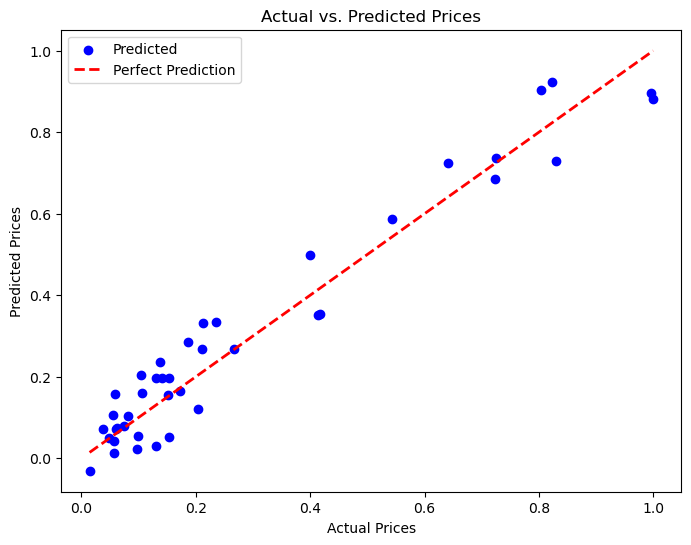

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_s, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()